<a href="https://colab.research.google.com/github/OCE1984/MScDataAnaltyicsPrinciples/blob/main/DAP_W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Trained Data Sets

In [ ]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import sys
importlib.reload(sys.modules['matplotlib.pyplot'])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [ ]:
path = r"/content/FIFA DATA.csv"

In [ ]:
with open(path, encoding = "ISO-8859-1", errors='ignore') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  line_count = 0
  for row in csv_reader:
    if line_count == 0:
      print(f'Column names are {", ".join(row)}')
      line_count += 1
    else:
      print(f'\tPlayer {row[0]} is {row[1]} aged {row[2]} from {row[3]}.')
      line_count += 1
print(f'Processed {line_count} lines.')

Column names are ï»¿PlayerId, Name, Age, Nationality, OverallRating, Potential, Club, Value , Wage
	Player 16 is Luis Garcia aged 37 from Spain.
	Player 41 is Iniesta aged 34 from Spain.
	Player 80 is E Belozoglu  aged 37 from Turkey.
	Player 164 is G. Pinzi aged 37 from Italy.
	Player 657 is D. Vaughan aged 35 from Wales.
	Player 768 is Felipe aged 33 from Brazil.
	Player 1179 is G. Buffon aged 40 from Italy.
	Player 2147 is M. Stekelenburg aged 35 from Netherlands.
	Player 2335 is A. Wilbraham aged 38 from England.
	Player 2702 is K. Ellison aged 39 from England.
	Player 3281 is Tarantini aged 34 from Portugal.
	Player 3484 is J. O'Shea aged 37 from Republic of Ireland.
	Player 3665 is B. Nivet aged 41 from France.
	Player 5479 is Casillas aged 37 from Spain.
	Player 6826 is G. Barry aged 37 from England.
	Player 7647 is D. Dainelli aged 39 from Italy.
	Player 9014 is A. Robben aged 34 from Netherlands.
	Player 9833 is D. Boer aged 37 from Netherlands.
	Player 10466 is S. Ishizaki ag

In [ ]:
df = pd.read_csv(path, encoding = "ISO-8859-1")
print(df.columns)

Index(['ï»¿PlayerId', 'Name', 'Age', 'Nationality', 'OverallRating',
       'Potential', 'Club', 'Value ', 'Wage'],
      dtype='object')


<Figure size 640x480 with 0 Axes>

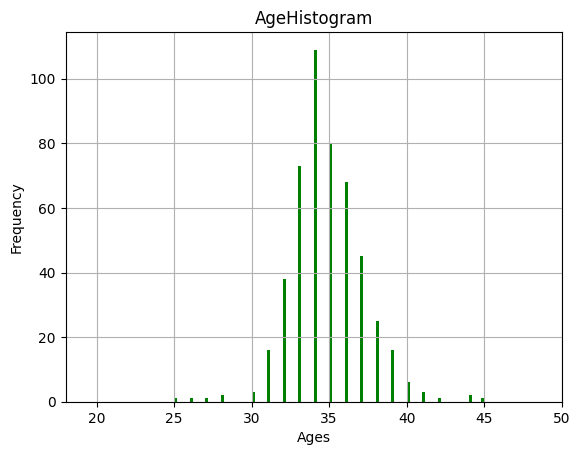

<Figure size 640x480 with 0 Axes>

In [ ]:
agehist=df['Age'].hist(bins=100, color="green")
agehist.set_xlim([18, 50])
agehist.set_xlabel("Ages")
agehist.set_ylabel("Frequency")
agehist.set_title("AgeHistogram")
plt.figure()

In [ ]:
df.head()

,ï»¿PlayerId,Name,Age,Nationality,OverallRating,Potential,Club,Value,Wage
0,16,Luis Garcia,37,Spain,71,71,KAS Eupen,750000,6000
1,41,Iniesta,34,Spain,86,86,Vissel Kobe,21000000,21000
2,80,E Belozoglu,37,Turkey,79,79,Medipol Basaksehir FK,4000000,23000
3,164,G. Pinzi,37,Italy,70,70,Padova,240000,2000
4,657,D. Vaughan,35,Wales,66,66,Notts County,150000,4000


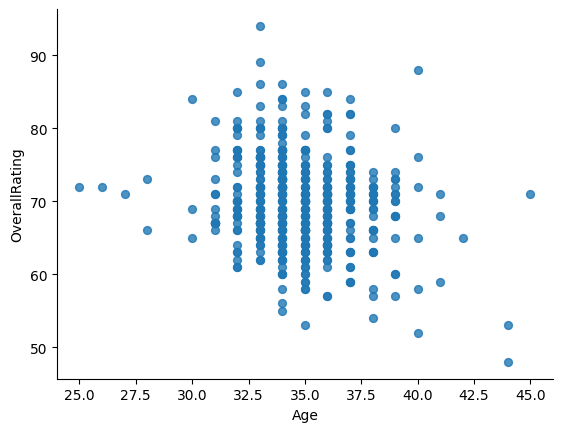

In [ ]:
# @title Age vs OverallRating

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='OverallRating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

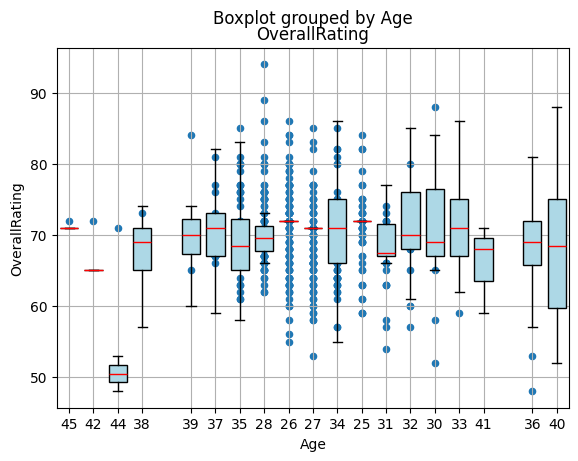

In [ ]:
from matplotlib import pyplot as plt

# Create the scatter plot
ax = df.plot(kind='scatter', x='Age', y='OverallRating')
plt.gca()

# Overlay box plots
df.boxplot(column='OverallRating', by='Age', ax=ax, positions=df['Age'].unique(),
           patch_artist=True, showfliers=False, widths=0.75,
           boxprops=dict(facecolor='lightblue', color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           medianprops=dict(color='red'))
plt.show()

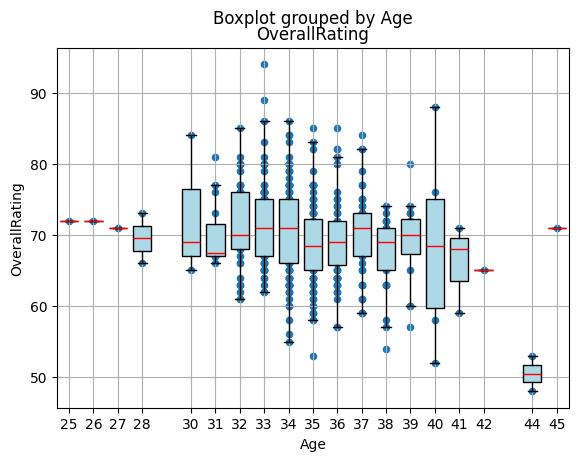

In [ ]:
from matplotlib import pyplot as plt

# Create the scatter plot
ax = df.plot(kind='scatter', x='Age', y='OverallRating')
plt.gca()

# Overlay box plots, sorting 'Age' values for positions
# Get unique ages and sort them
positions = sorted(df['Age'].unique())
df.boxplot(column='OverallRating', by='Age', ax=ax, positions=positions,
           patch_artist=True, showfliers=False, widths=0.75,
           boxprops=dict(facecolor='lightblue', color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           medianprops=dict(color='red'))

plt.show()

In [ ]:
df.describe()

,ï»¿PlayerId,Age,OverallRating,Potential,Value,Wage
count,491.000000,491.000000,491.000000,491.000000,4.910000e+02,491.000000
mean,105470.319756,34.778004,69.887984,69.904277,1.817923e+06,13692.464358
std,47019.383864,2.343381,6.278704,6.288717,4.759815e+06,28288.548275
min,16.000000,25.000000,48.000000,48.000000,0.000000e+00,1000.000000
25%,53611.500000,33.000000,66.000000,66.000000,1.700000e+05,2000.000000
50%,135190.000000,35.000000,70.000000,70.000000,4.250000e+05,5000.000000
75%,140433.000000,36.000000,73.000000,73.500000,2.000000e+06,13500.000000
max,149064.000000,45.000000,94.000000,94.000000,7.700000e+07,405000.000000


<Figure size 640x480 with 0 Axes>

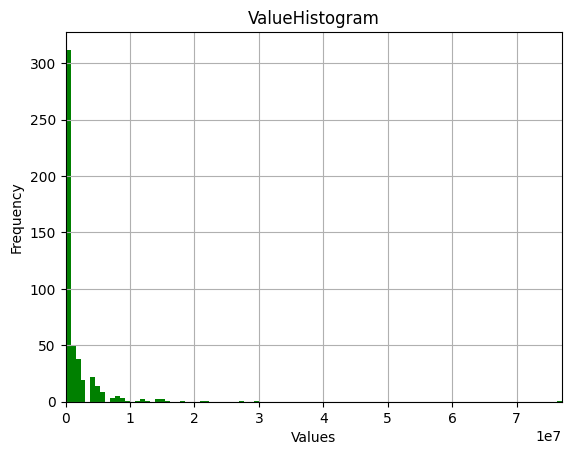

<Figure size 640x480 with 0 Axes>

In [ ]:
valuehist=df['Value '].hist(bins=100, color="green")
valuehist.set_xlim([0, 7.700000e+07])
valuehist.set_xlabel("Values")
valuehist.set_ylabel("Frequency")
valuehist.set_title("ValueHistogram")
plt.figure()

<Figure size 640x480 with 0 Axes>

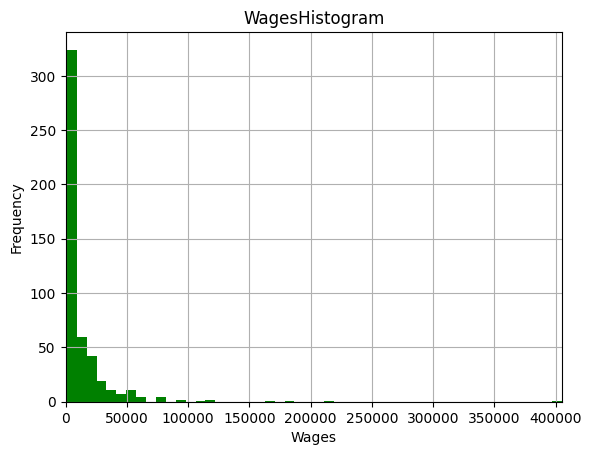

<Figure size 640x480 with 0 Axes>

In [ ]:
wagehist=df['Wage'].hist(bins=50, color="green")
wagehist.set_xlim([0, 405000])
wagehist.set_xlabel("Wages")
wagehist.set_ylabel("Frequency")
wagehist.set_title("WagesHistogram")
plt.figure()

<Figure size 640x480 with 0 Axes>

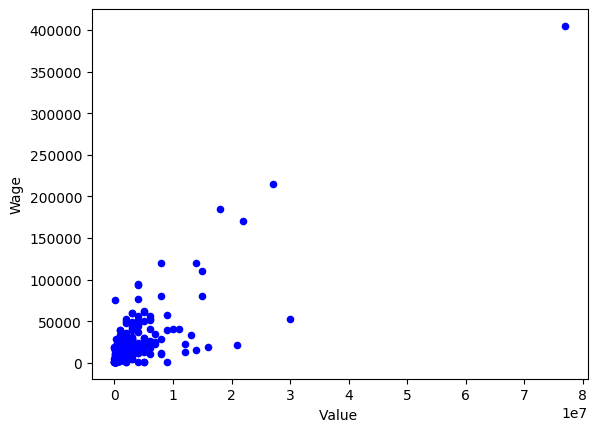

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter = df.plot.scatter(x='Value ', y='Wage', color='blue')

plt.figure()

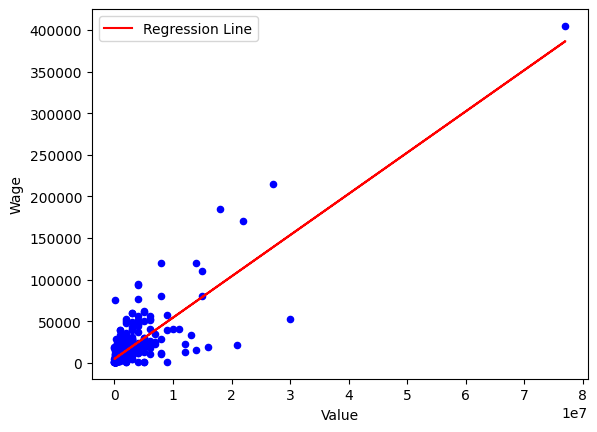

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'Value ' and 'Wage' columns

# Create the scatter plot
plt.scatter = df.plot.scatter(x='Value ', y='Wage', color='blue')

# Calculate the regression line
# m, b = np.polyfit(x, y, 1): This is the key line for regression.
# It uses NumPy's polyfit function to fit a first-degree polynomial
# (a straight line) to the data points (x and y). m and b will store the slope
# and y-intercept of this line, respectively.
x = df['Value ']
y = df['Wage']
m, b = np.polyfit(x, y, 1)  # Fit a first-degree polynomial (line)

# Add the regression line to the plot
plt.plot(x, m*x + b, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Wage')
plt.legend()

# Show the plot
plt.show()